The `%matplotlib` magic command is used here to enable plotting in the current notebook. The `inline` backend will embed plots inside the notebook.

In [1]:
%matplotlib inline

#### Import necessary modules

In [2]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

#### Create a file list for the yearly files

In [3]:
file_paths = []
ID = 'AZPG*'
for root, dirs, files in os.walk('../Data/'): 
       file_paths += glob.glob(os.path.join(root, ID))   

#### Read each file and append to previous year

In [4]:
dff = []
for file_path in file_paths:
         df = pd.read_csv(file_path, delim_whitespace = True,  usecols=[0,1,4,5,6], header = None)
         df.columns = ["decday", "pwv",  "P", "T", "RH"]
         lhs, rhs =  file_path.split("_")
         yyy, junk = rhs.split(".")
         yy2 = str(int(yyy)-1)
         prevyear =  yy2 + str('-12-31')
         df['date'] = pd.Timestamp(prevyear)
         df['date'] = df['date'] + pd.to_timedelta(df['decday'], unit ='D')
         dff.append(df)
dff = pd.concat(dff, axis=0)
dff['datetime'] = pd.to_datetime(dff['date'])
dff['month'] = dff['datetime'].dt.month
dff = dff.set_index('datetime')

In [5]:
dff

,decday,pwv,P,T,RH,date,month
datetime,,,,,,,
2012-06-15 00:15:00.288000000,167.01042,6.5,860.3,35.0,4.0,2012-06-15 00:15:00.288000000,6
2012-06-15 00:45:00.000000000,167.03125,6.2,860.3,35.0,4.0,2012-06-15 00:45:00.000000000,6
2012-06-15 01:14:59.712000000,167.05208,7.0,860.3,34.4,4.2,2012-06-15 01:14:59.712000000,6
2012-06-15 01:45:00.288000000,167.07292,7.3,860.3,34.0,4.2,2012-06-15 01:45:00.288000000,6
2012-06-15 02:15:00.000000000,167.09375,6.3,860.5,32.8,4.8,2012-06-15 02:15:00.000000000,6
2012-06-15 02:44:59.712000000,167.11458,6.5,860.6,32.0,5.1,2012-06-15 02:44:59.712000000,6
2012-06-15 03:15:00.288000000,167.13542,6.8,860.6,30.8,5.3,2012-06-15 03:15:00.288000000,6
2012-06-15 03:45:00.000000000,167.15625,6.8,860.6,30.0,5.3,2012-06-15 03:45:00.000000000,6
2012-06-15 04:14:59.711999999,167.17708,7.0,861.0,28.8,6.0,2012-06-15 04:14:59.711999999,6


#### We can make boxplots of precipitable water by season

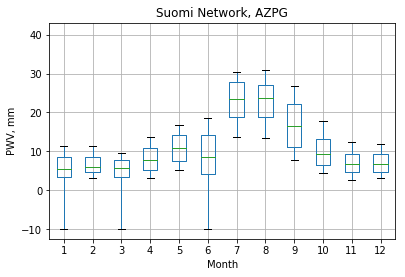

In [6]:
dff.boxplot('pwv', by=dff.month, whis=[10,90], sym=' ')
plt.ylabel('PWV, mm')
plt.xlabel('Month')
plt.title('Suomi Network, AZPG')
plt.suptitle("")
#fname='../Figures/PWV_seasonal.pdf'
#plt.savefig(fname)

#### Time series plot

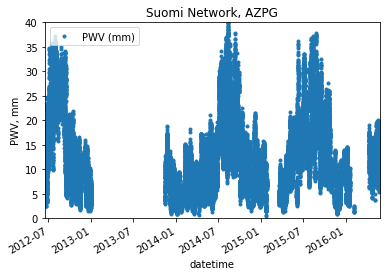

In [7]:
dff.plot(y='pwv', style='.', label='PWV (mm)')
plt.legend(loc='best')
plt.ylabel('PWV, mm')
plt.ylim(ymax=40, ymin =0)
plt.title('Suomi Network, AZPG');

#### Change time axis range

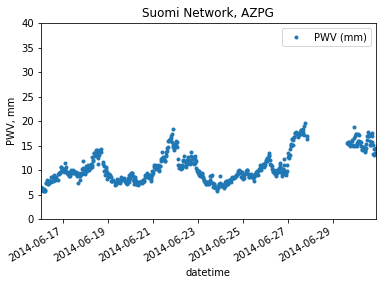

In [8]:
dff2 = (dff.loc['2014-6-16':'2014-6-30'])
dff2.plot(y='pwv',style='.', label='PWV (mm)')
plt.legend(loc='best')
plt.ylabel('PWV, mm')
plt.ylim(ymax=40, ymin =0)
plt.title('Suomi Network, AZPG');

#### Show the statistics

In [9]:
dff.describe(percentiles = [.1,.25,.5])

,decday,pwv,P,T,RH,month
count,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000
mean,203.206765,11.096591,810.746465,10.237839,28.354430,7.162770
std,101.533336,9.194718,228.764744,29.526700,38.395737,3.321462
min,1.385420,-9.900000,-99.900000,-99.900000,-99.900000,1.000000
10%,58.245832,3.300000,859.600000,-1.000000,8.700000,2.000000
25%,122.036457,5.800000,864.400000,6.800000,17.100000,5.000000
50%,211.010420,9.500000,867.800000,17.000000,30.000000,7.000000
max,366.989580,40.500000,885.000000,41.000000,100.000000,12.000000
